In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_excel('/content/HousePricePrediction.xlsx')
df

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2914,160,RM,1936,Inside,Twnhs,7,1970,1970,CemntBd,0.0,546.0,NaN
2915,2915,160,RM,1894,Inside,TwnhsE,5,1970,1970,CemntBd,0.0,546.0,NaN
2916,2916,20,RL,20000,Inside,1Fam,7,1960,1996,VinylSd,0.0,1224.0,NaN
2917,2917,85,RL,10441,Inside,1Fam,5,1992,1992,HdBoard,0.0,912.0,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2919 non-null   int64  
 1   MSSubClass    2919 non-null   int64  
 2   MSZoning      2915 non-null   object 
 3   LotArea       2919 non-null   int64  
 4   LotConfig     2919 non-null   object 
 5   BldgType      2919 non-null   object 
 6   OverallCond   2919 non-null   int64  
 7   YearBuilt     2919 non-null   int64  
 8   YearRemodAdd  2919 non-null   int64  
 9   Exterior1st   2918 non-null   object 
 10  BsmtFinSF2    2918 non-null   float64
 11  TotalBsmtSF   2918 non-null   float64
 12  SalePrice     1460 non-null   float64
dtypes: float64(3), int64(6), object(4)
memory usage: 296.6+ KB


In [ ]:
df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Id,2919.0,NaN,NaN,NaN,1459.0,842.787043,0.0,729.5,1459.0,2188.5,2918.0
MSSubClass,2919.0,NaN,NaN,NaN,57.137718,42.517628,20.0,20.0,50.0,70.0,190.0
MSZoning,2915,5,RL,2265,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotArea,2919.0,NaN,NaN,NaN,10168.11408,7886.996359,1300.0,7478.0,9453.0,11570.0,215245.0
LotConfig,2919,5,Inside,2133,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BldgType,2919,5,1Fam,2425,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OverallCond,2919.0,NaN,NaN,NaN,5.564577,1.113131,1.0,5.0,5.0,6.0,9.0
YearBuilt,2919.0,NaN,NaN,NaN,1971.312778,30.291442,1872.0,1953.5,1973.0,2001.0,2010.0
YearRemodAdd,2919.0,NaN,NaN,NaN,1984.264474,20.894344,1950.0,1965.0,1993.0,2004.0,2010.0
Exterior1st,2918,15,VinylSd,1025,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.shape

(2919, 13)

In [ ]:
df.isna().sum()


,0
Id,0
MSSubClass,0
MSZoning,4
LotArea,0
LotConfig,0
BldgType,0
OverallCond,0
YearBuilt,0
YearRemodAdd,0
Exterior1st,1


In [ ]:
df.dtypes

,0
Id,int64
MSSubClass,int64
MSZoning,object
LotArea,int64
LotConfig,object
BldgType,object
OverallCond,int64
YearBuilt,int64
YearRemodAdd,int64
Exterior1st,object


<Axes: >

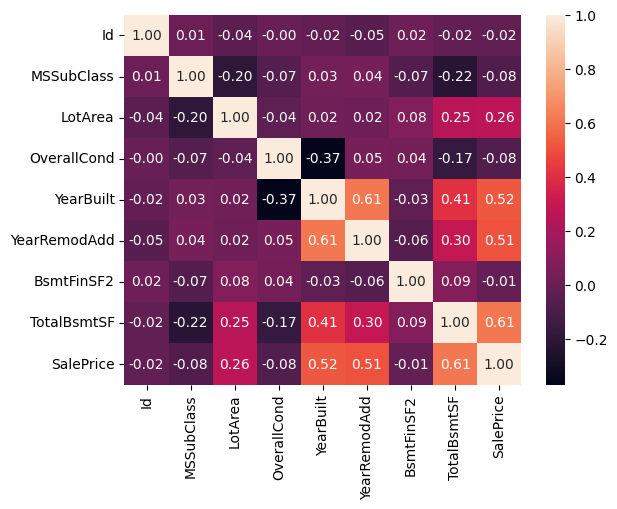

In [ ]:
df.corr(numeric_only=True)
sns.heatmap(df.corr(numeric_only=True), annot = True,fmt='.2f')

In [ ]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'LotConfig', 'BldgType',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'Exterior1st', 'BsmtFinSF2',
       'TotalBsmtSF', 'SalePrice'],
      dtype='object')

In [ ]:
df.drop(['Id', 'MSSubClass','OverallCond','BsmtFinSF2'],axis=1,inplace=True)

In [ ]:
df.columns

Index(['MSZoning', 'LotArea', 'LotConfig', 'BldgType', 'YearBuilt',
       'YearRemodAdd', 'Exterior1st', 'TotalBsmtSF', 'SalePrice'],
      dtype='object')

In [ ]:
df.dtypes
df


,MSZoning,LotArea,LotConfig,BldgType,YearBuilt,YearRemodAdd,Exterior1st,TotalBsmtSF,SalePrice
0,RL,8450,Inside,1Fam,2003,2003,VinylSd,856.0,208500.0
1,RL,9600,FR2,1Fam,1976,1976,MetalSd,1262.0,181500.0
2,RL,11250,Inside,1Fam,2001,2002,VinylSd,920.0,223500.0
3,RL,9550,Corner,1Fam,1915,1970,Wd Sdng,756.0,140000.0
4,RL,14260,FR2,1Fam,2000,2000,VinylSd,1145.0,250000.0
...,...,...,...,...,...,...,...,...,...
2914,RM,1936,Inside,Twnhs,1970,1970,CemntBd,546.0,NaN
2915,RM,1894,Inside,TwnhsE,1970,1970,CemntBd,546.0,NaN
2916,RL,20000,Inside,1Fam,1960,1996,VinylSd,1224.0,NaN
2917,RL,10441,Inside,1Fam,1992,1992,HdBoard,912.0,NaN


In [ ]:
cont_col=[i for i in df.columns if df[i].dtype!='object']
df[cont_col].dtypes


,0
LotArea,int64
YearBuilt,int64
YearRemodAdd,int64
TotalBsmtSF,float64
SalePrice,float64


LotArea
7478.0 11570.0 4092.0
1340.0
17708.0


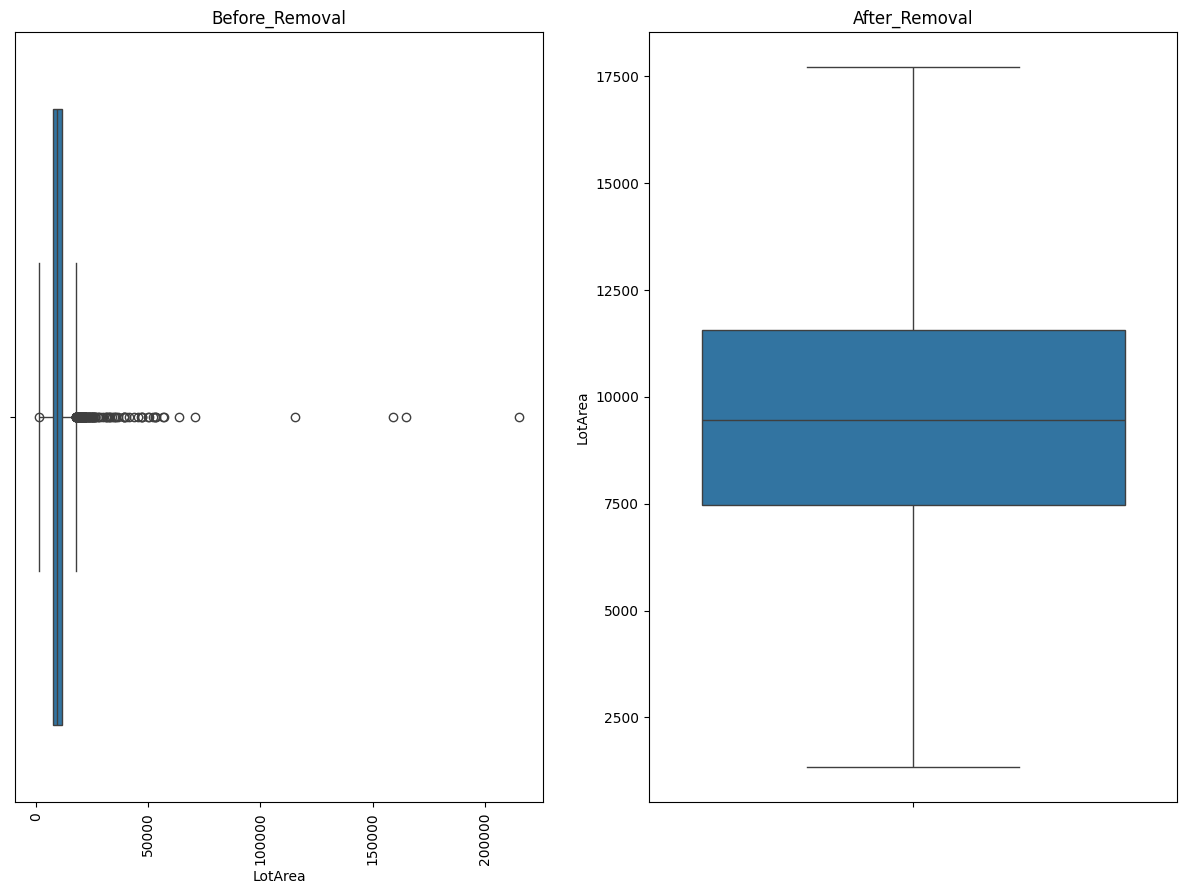

YearBuilt
1953.5 2001.0 47.5
1882.25
2072.25


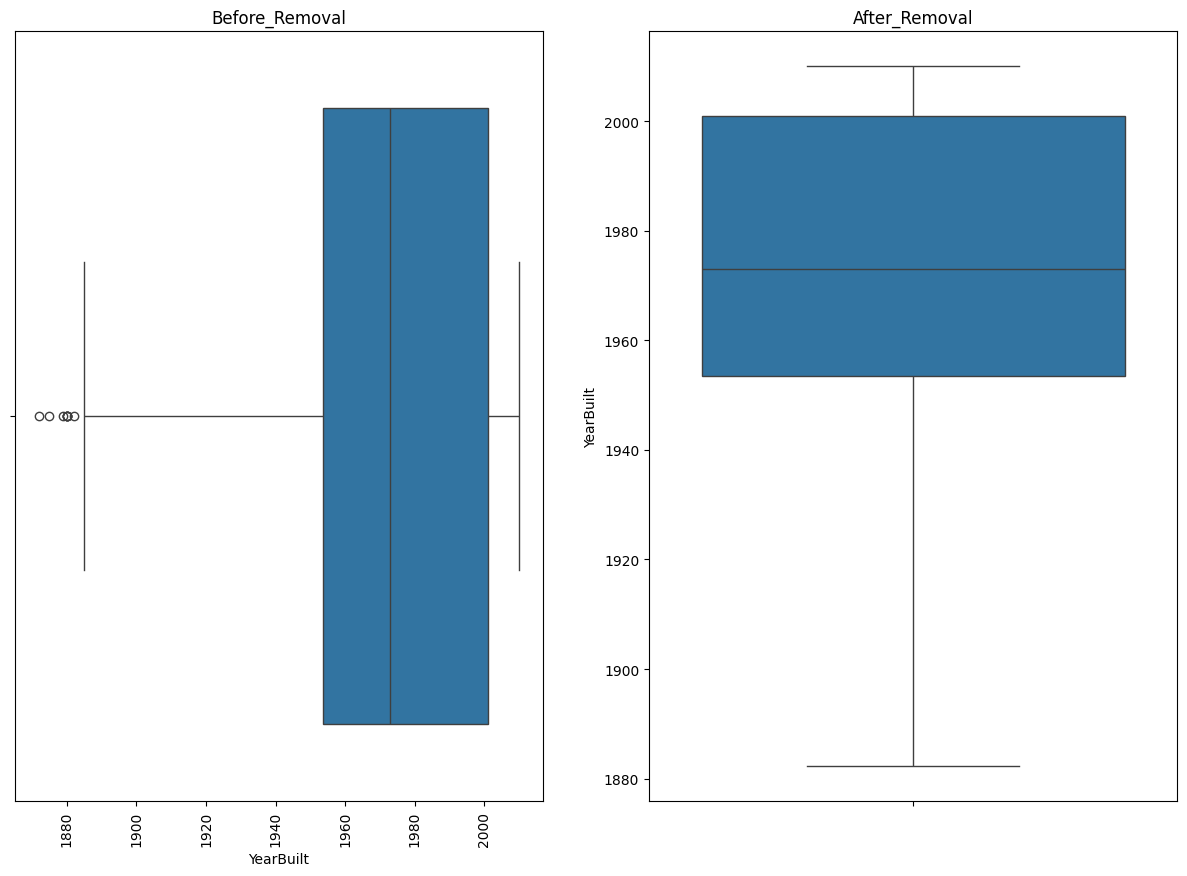

YearRemodAdd
1965.0 2004.0 39.0
1906.5
2062.5


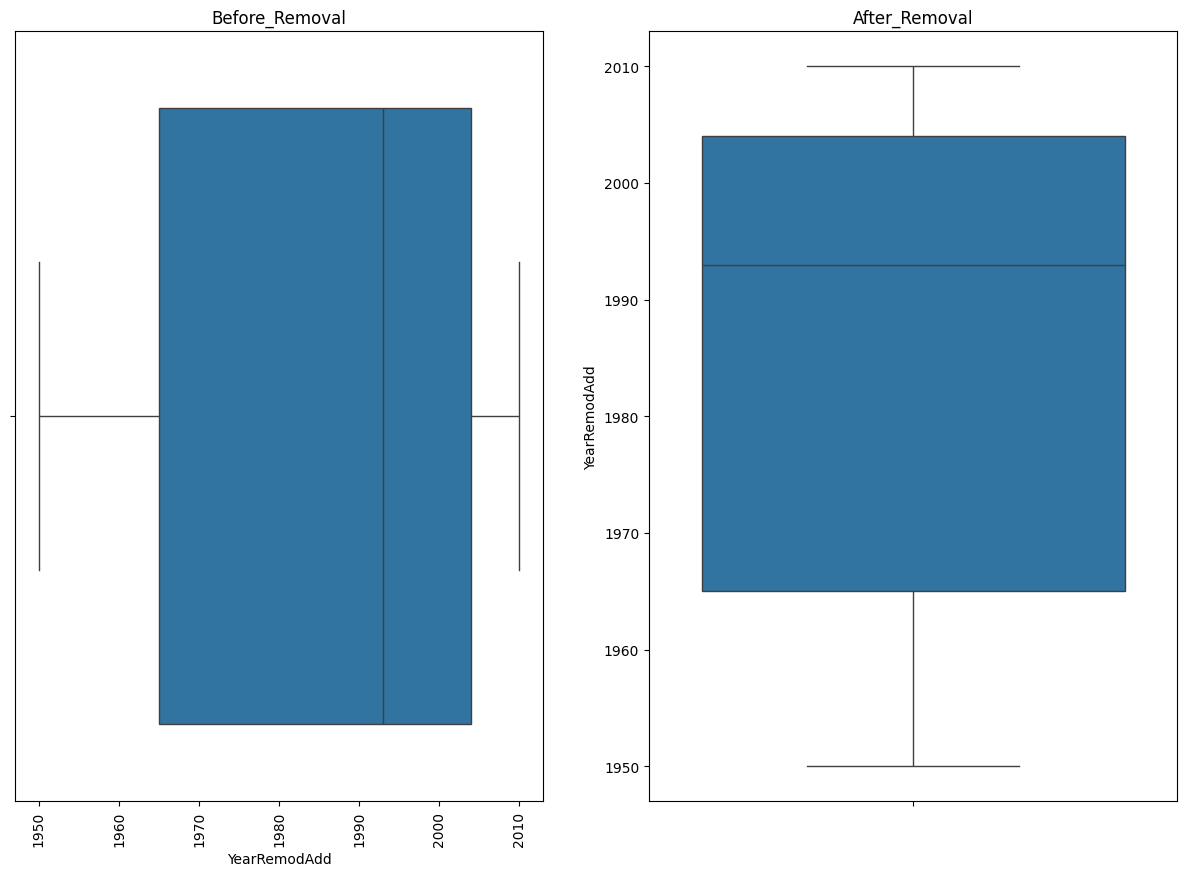

In [ ]:
for column_name in cont_col[:-2]:
   print(column_name)
   Q1,Q3=np.percentile(df[column_name],[25,75],method='midpoint')
   IQR=Q3-Q1
   print(Q1,Q3,IQR)
   lower_bound=Q1-(1.5*IQR)
   upper_bound=Q3+(1.5*IQR)
   print(lower_bound)
   print(upper_bound)

  #  before outlier
   plt.figure(figsize=(15,10))
   plt.subplot(1,2,1)
   sns.boxplot(x=df[column_name])
   plt.title('Before_Removal')
   plt.xticks(rotation=90)


  # clipping outliers
   df[column_name]=df[column_name].clip(lower_bound,upper_bound)

  # after _outlier
   plt.subplot(1,2,2)
   sns.boxplot(df[column_name])
   plt.title('After_Removal')
   plt.xticks(rotation=90)
   plt.show()

<Axes: ylabel='TotalBsmtSF'>

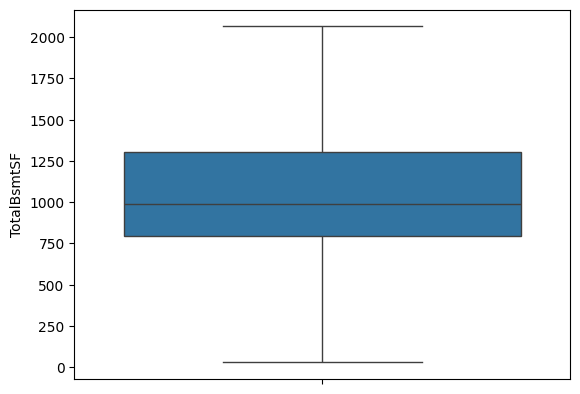

In [ ]:
upper_whisker=1302+1.5*(1302-793)
lower_whisker=793-1.5*(1302-793)

df['TotalBsmtSF']=df['TotalBsmtSF'].clip(lower_whisker,upper_whisker)
sns.boxplot(df['TotalBsmtSF'])

In [ ]:
lst1=[i for i in df.columns if df[i].dtype=='object']
df_cat=df[lst1]
lst=[]
for i in lst1:
 lst.append(df[i].unique().size)
lst


[6, 5, 5, 16]

<Axes: xlabel='None'>

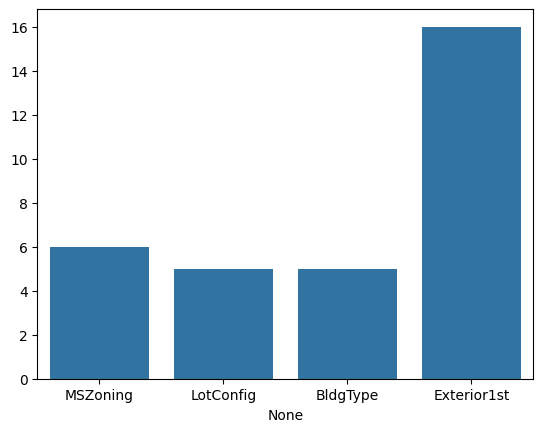

In [ ]:
# categories in each
sns.barplot(x=df_cat.columns,y=lst)

In [ ]:
# The plot shows that Exterior1st has around 16 unique categories and other features have around  6 unique categories.
#  To findout the actual count of each category we can plot the bargraph of each four features separately.

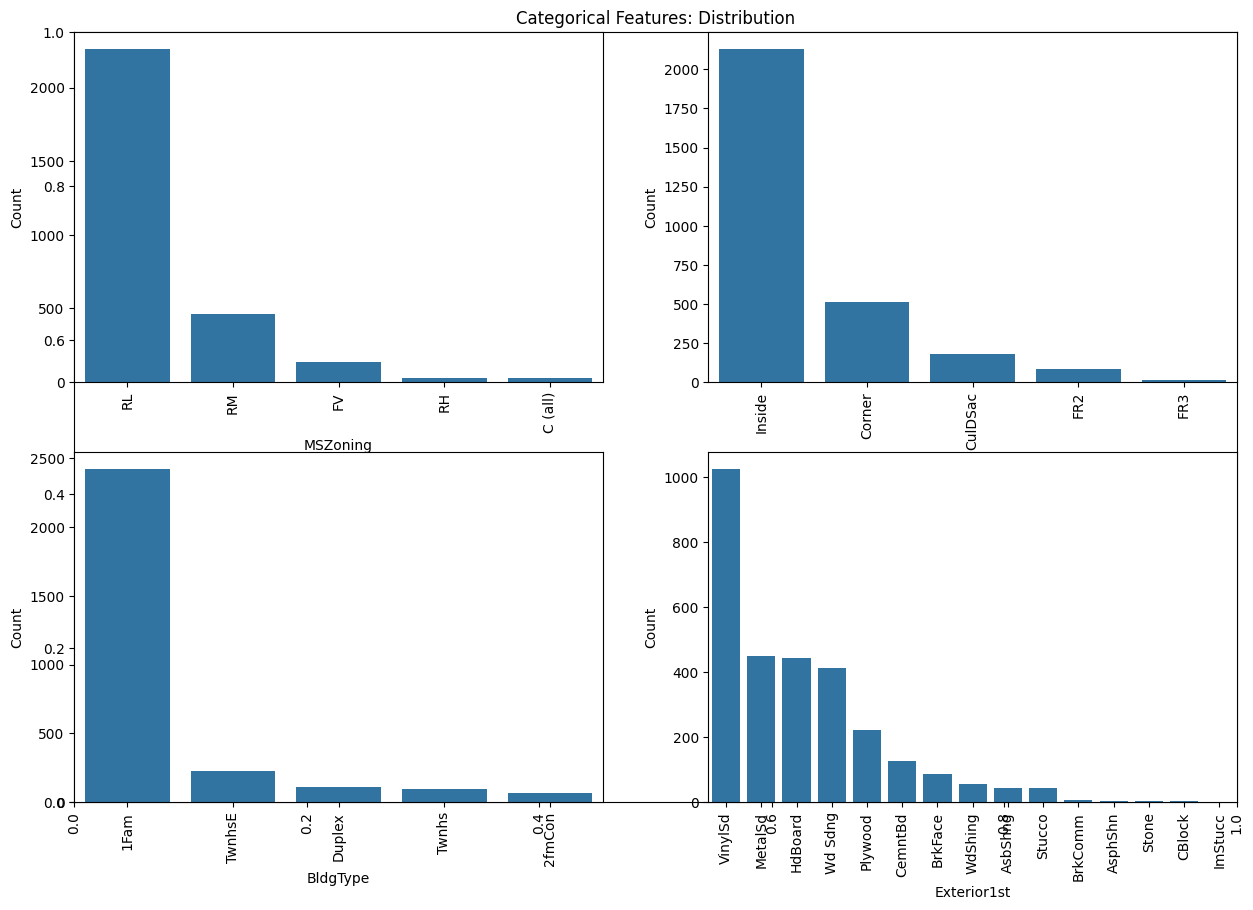

In [ ]:
plt.figure(figsize=(15,10))
plt.title('Categorical Features: Distribution')
plt.xticks(rotation=90)
index=1

for i in lst1:
  y=df[i].value_counts()
  plt.subplot(2, 2, index)
  plt.xticks(rotation=90)
  sns.barplot(x=y.index,y=y.values)
  plt.xlabel(i)
  plt.ylabel(f'Count')
  index+=1


In [ ]:
# Data Cleaning

# Data Cleaning is the way to improvise the data or remove incorrect, corrupted or irrelevant data.

# As in our dataset, there are some columns that are not important and irrelevant for the model training. So, we can drop that column before training. There are 2 approaches to dealing with empty/null values

#     We can easily delete the column/row (if the feature or record is not much important).
#     Filling the empty slots with mean/mode/0/NA/etc. (depending on the dataset requirement)

In [ ]:
df.columns

Index(['MSZoning', 'LotArea', 'LotConfig', 'BldgType', 'YearBuilt',
       'YearRemodAdd', 'Exterior1st', 'TotalBsmtSF', 'SalePrice'],
      dtype='object')

In [ ]:
df['SalePrice']=df['SalePrice'].fillna(df['SalePrice'].mean())

In [ ]:
df.isna().sum()

,0
MSZoning,4
LotArea,0
LotConfig,0
BldgType,0
YearBuilt,0
YearRemodAdd,0
Exterior1st,1
TotalBsmtSF,1
SalePrice,0


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isna().sum()

,0
MSZoning,0
LotArea,0
LotConfig,0
BldgType,0
YearBuilt,0
YearRemodAdd,0
Exterior1st,0
TotalBsmtSF,0
SalePrice,0


In [ ]:
df_encoded=pd.get_dummies(df[lst1],dtype=int,drop_first=True)
df_encoded


,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,BldgType_2fmCon,BldgType_Duplex,...,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,1,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,0,0,0,1,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
2915,0,0,0,1,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
2916,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2917,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
df_final=pd.concat([df,df_encoded],axis=1)
df_final

,MSZoning,LotArea,LotConfig,BldgType,YearBuilt,YearRemodAdd,Exterior1st,TotalBsmtSF,SalePrice,MSZoning_FV,...,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,RL,8450,Inside,1Fam,2003.0,2003,VinylSd,856.0,208500.00000,0,...,0,0,0,0,0,0,0,1,0,0
1,RL,9600,FR2,1Fam,1976.0,1976,MetalSd,1262.0,181500.00000,0,...,0,0,0,1,0,0,0,0,0,0
2,RL,11250,Inside,1Fam,2001.0,2002,VinylSd,920.0,223500.00000,0,...,0,0,0,0,0,0,0,1,0,0
3,RL,9550,Corner,1Fam,1915.0,1970,Wd Sdng,756.0,140000.00000,0,...,0,0,0,0,0,0,0,0,1,0
4,RL,14260,FR2,1Fam,2000.0,2000,VinylSd,1145.0,250000.00000,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,RM,1936,Inside,Twnhs,1970.0,1970,CemntBd,546.0,180921.19589,0,...,1,0,0,0,0,0,0,0,0,0
2915,RM,1894,Inside,TwnhsE,1970.0,1970,CemntBd,546.0,180921.19589,0,...,1,0,0,0,0,0,0,0,0,0
2916,RL,17708,Inside,1Fam,1960.0,1996,VinylSd,1224.0,180921.19589,0,...,0,0,0,0,0,0,0,1,0,0
2917,RL,10441,Inside,1Fam,1992.0,1992,HdBoard,912.0,180921.19589,0,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
df_final.drop(lst1,axis=1,inplace=True)
df_final.columns

Index(['LotArea', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', 'SalePrice',
       'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3',
       'LotConfig_Inside', 'BldgType_2fmCon', 'BldgType_Duplex',
       'BldgType_Twnhs', 'BldgType_TwnhsE', 'Exterior1st_AsphShn',
       'Exterior1st_BrkComm', 'Exterior1st_BrkFace', 'Exterior1st_CBlock',
       'Exterior1st_CemntBd', 'Exterior1st_HdBoard', 'Exterior1st_ImStucc',
       'Exterior1st_MetalSd', 'Exterior1st_Plywood', 'Exterior1st_Stone',
       'Exterior1st_Stucco', 'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng',
       'Exterior1st_WdShing'],
      dtype='object')

In [ ]:
x=df_final.drop(['SalePrice'],axis=1)
y=df_final['SalePrice']
df_final

,LotArea,YearBuilt,YearRemodAdd,TotalBsmtSF,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotConfig_CulDSac,...,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,8450,2003.0,2003,856.0,208500.00000,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,9600,1976.0,1976,1262.0,181500.00000,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,11250,2001.0,2002,920.0,223500.00000,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,9550,1915.0,1970,756.0,140000.00000,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,14260,2000.0,2000,1145.0,250000.00000,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,1936,1970.0,1970,546.0,180921.19589,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
2915,1894,1970.0,1970,546.0,180921.19589,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
2916,17708,1960.0,1996,1224.0,180921.19589,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2917,10441,1992.0,1992,912.0,180921.19589,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
x_train

,LotArea,YearBuilt,YearRemodAdd,TotalBsmtSF,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotConfig_CulDSac,LotConfig_FR2,...,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
2554,10042,1920.0,1995,660.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
776,11210,2005.0,2006,1614.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
841,10440,1904.0,2002,650.0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
621,10800,1974.0,1997,1522.0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1399,6171,1925.0,1990,976.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,10928,1978.0,1986,1427.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1095,9317,2006.0,2006,1314.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1130,7804,1928.0,1950,1122.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1294,8172,1955.0,1990,864.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)
x_test

array([[0.98244101, 0.98434442, 0.98333333, ..., 1.        , 0.        ,
        0.        ],
       [0.63871604, 0.98434442, 0.96666667, ..., 1.        , 0.        ,
        0.        ],
       [0.5352104 , 0.44422701, 0.        , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.51537182, 0.30332681, 0.8       , ..., 0.        , 0.        ,
        0.        ],
       [0.47446245, 0.98434442, 0.96666667, ..., 1.        , 0.        ,
        0.        ],
       [0.43453885, 0.88258317, 0.76666667, ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error

def prediction(model_alg):
  print(f'model is {model_alg}')
  model=model_alg
  model.fit(x_train,y_train)
  y_pred=model.predict(x_test)
  print('R2 Score:',r2_score(y_test,y_pred))
  print('MSE:',mean_absolute_percentage_error(y_test,y_pred))

In [ ]:
prediction(LinearRegression())

model is LinearRegression()
R2 Score: 0.29699152575409893
MSE: 0.202924549731462


In [ ]:
prediction(DecisionTreeRegressor())

model is DecisionTreeRegressor()
R2 Score: -0.30967084116326027
MSE: 0.25277191307020525


In [ ]:
prediction(RandomForestRegressor())

model is RandomForestRegressor()
R2 Score: 0.2725738912355161
MSE: 0.21008555757930655
